## Part1 : Mutual Information Classification

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

In [11]:
# Load the dataset

In [12]:
loan_data = pd.read_csv("loan.csv")

In [13]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
# Checking Null Values

In [15]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Handle missing values 

In [17]:
loan_data.fillna(0, inplace = True)

In [18]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# Encode categorical variables
# I am trying to use label Encoder but it gives me constant error so that's why i use this code to encode categorical variables

In [20]:
categorical_columns = loan_data.select_dtypes(include=['object']).columns

In [21]:
for col in categorical_columns:
    loan_data[col], _ = loan_data[col].astype(str).factorize()

In [22]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,5849,0.0,0.0,360.0,1.0,0,0
1,1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,2,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,3,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,1,0,0,0,0,2900,0.0,71.0,360.0,1.0,1,0
610,610,0,1,3,0,0,4106,0.0,40.0,180.0,1.0,1,0
611,611,0,1,1,0,0,8072,240.0,253.0,360.0,1.0,0,0
612,612,0,1,2,0,0,7583,0.0,187.0,360.0,1.0,0,0


In [23]:
# Separate features (x) and target variable (y)

In [24]:
x = loan_data.drop("Loan_Status", axis=1)

In [25]:
y = loan_data["Loan_Status"]

In [1]:
# Split the dataset into training and testing sets

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(491, 12)

In [29]:
x_test.shape

(123, 12)

In [30]:
# Use SelectKBest with mutual information classification to select top K features

In [31]:
k_best_features = 5
feature_selector = SelectKBest(mutual_info_classif, k=k_best_features)
x_train_selected = feature_selector.fit_transform(x_train, y_train)

In [77]:
# Get the indices of the selected features

In [32]:
selected_feature_indices = feature_selector.get_support(indices=True)

In [78]:
# Print the names or indices of the selected features

In [33]:
selected_feature_names = x.columns[selected_feature_indices]
print(f"Selected features: {selected_feature_names}")

Selected features: Index(['Gender', 'Education', 'ApplicantIncome', 'Credit_History',
       'Property_Area'],
      dtype='object')


## Bonus Task

In [34]:
mutual_info_scores = feature_selector.scores_
feature_names = x.columns

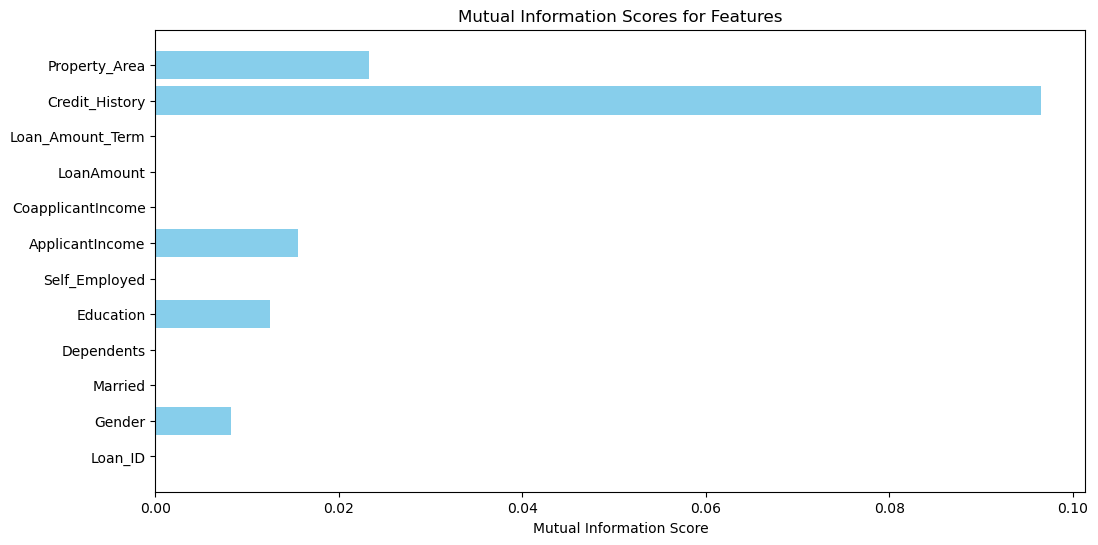

In [35]:
plt.figure(figsize=(12, 6))
plt.barh(feature_names, mutual_info_scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Features')
plt.show()

## Part 2 : Mutual Information Regression

In [36]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder

In [79]:
# Load the dataset

In [37]:
housing_data = pd.read_csv("housing.csv")

In [38]:
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [88]:
# Handle missing values

In [39]:
housing_data.fillna(0, inplace=True)

In [40]:
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [90]:
# Separate features (x) and target variable (y)

In [41]:
x = housing_data.drop("SalePrice", axis=1)

In [42]:
x.drop("Fence", axis = 1, inplace = True)

In [43]:
x.drop("MiscFeature", axis = 1, inplace = True)

In [44]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,272,0,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,112,0,0,0,0,0,4,2010,WD,Normal


In [45]:
y = housing_data["SalePrice"]

In [46]:
y.shape

(1460,)

In [47]:
categorical_columns1 = x.select_dtypes(include=['object']).columns

In [48]:
x[categorical_columns1] = x[categorical_columns1].astype(str)

In [49]:
encoder = OneHotEncoder(drop='first', sparse=False)
x_encoded = pd.DataFrame(encoder.fit_transform(x[categorical_columns1]))
x.drop(categorical_columns1, axis=1, inplace=True)
x = pd.concat([x, x_encoded], axis=1)

/Users/mithilkatkar/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
x.columns = x.columns.astype(str)

In [82]:
# Use SelectKBest with mutual information regression to select top K features

In [51]:
k_best_features = 5 
feature_selector = SelectKBest(mutual_info_regression, k=k_best_features)
x_selected = feature_selector.fit_transform(x, y)

In [83]:
# Get the indices of the selected features

In [52]:
selected_feature_indices = feature_selector.get_support(indices=True)

In [84]:
# Print the names or indices of the selected features

In [53]:
selected_feature_names = x.columns[selected_feature_indices]
print(f"Selected features: {selected_feature_names}")

Selected features: Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], dtype='object')


## Bonus Task

In [54]:
mutual_info_scores = feature_selector.scores_
feature_names = x.columns

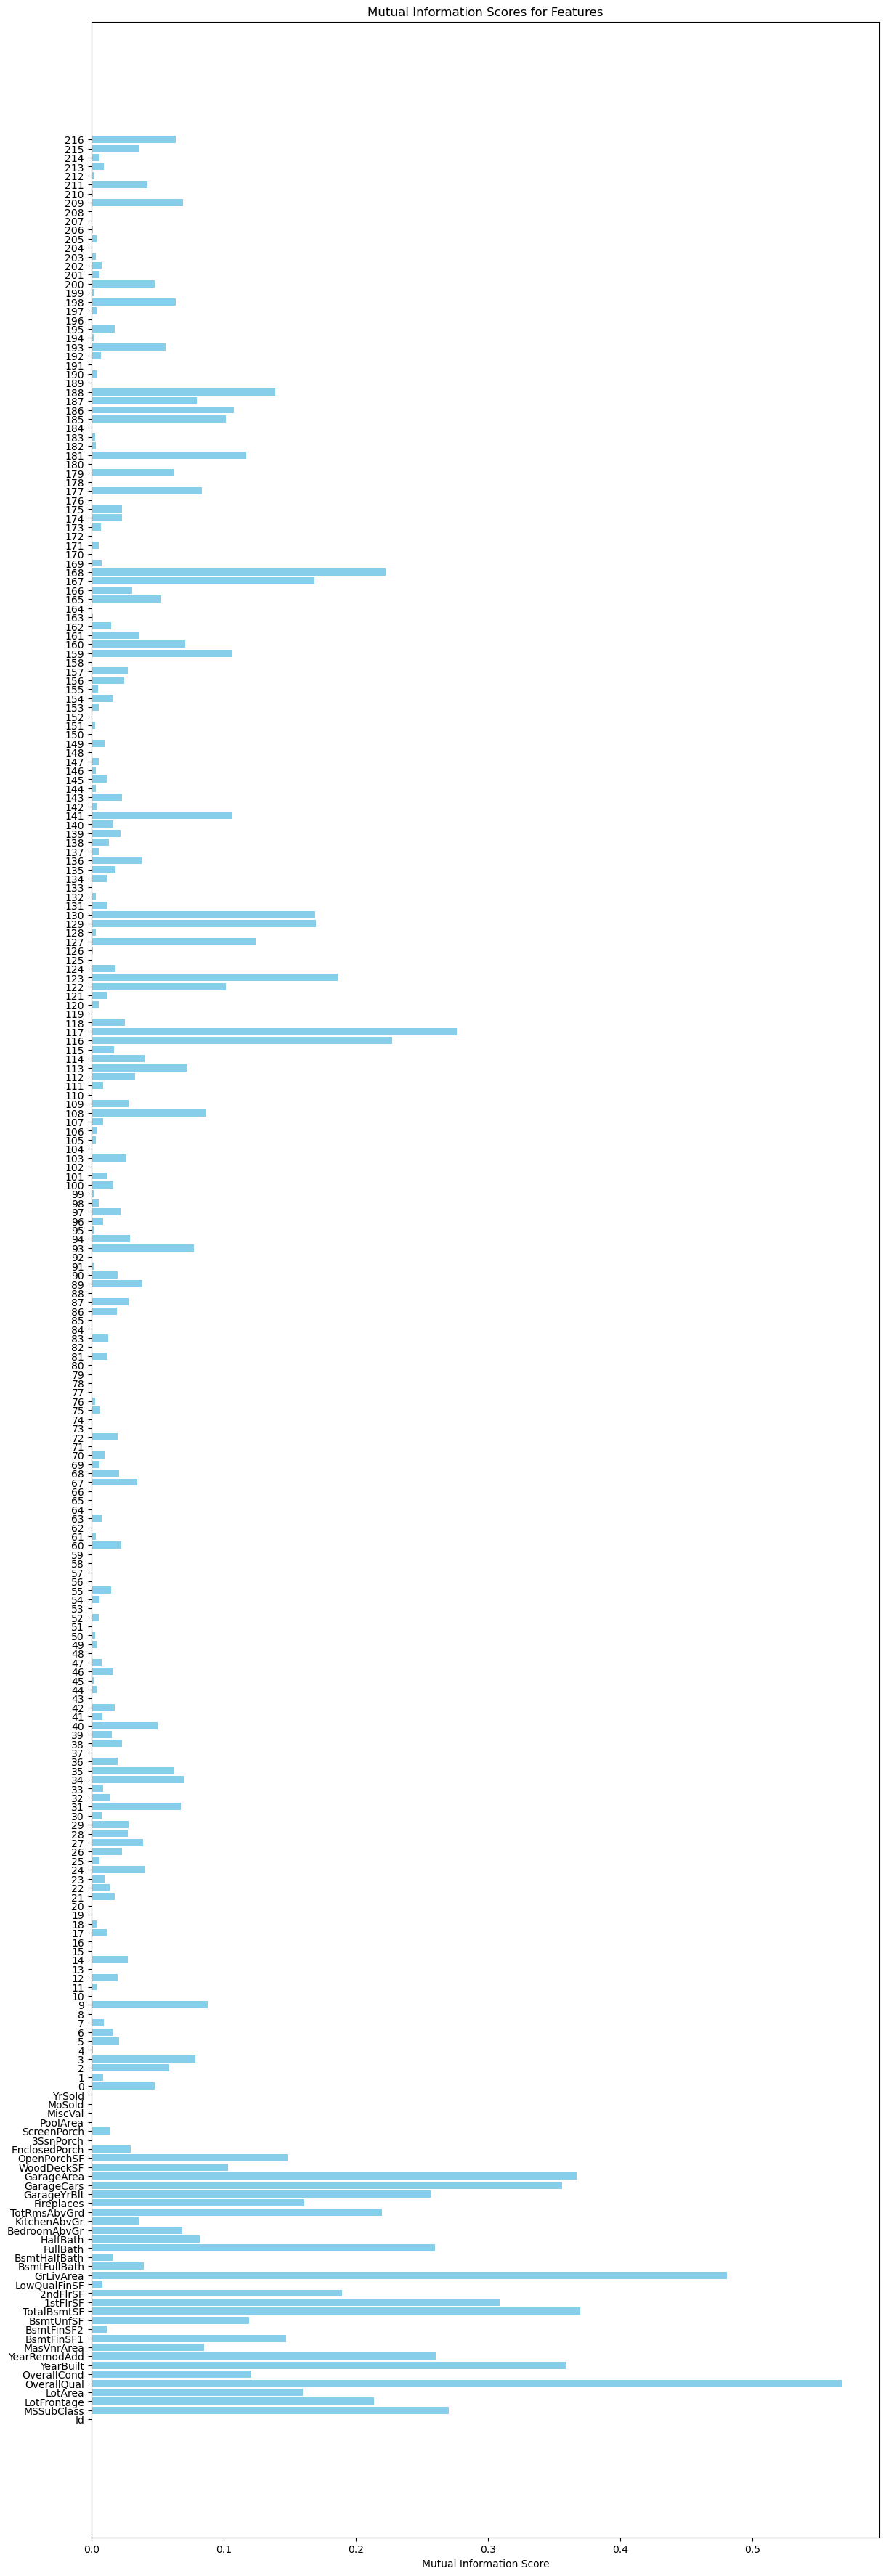

In [55]:
plt.figure(figsize=(14,45))
plt.barh(feature_names, mutual_info_scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Features')
plt.show()

## Part 3 : Linear Regression on the Housing Dataset

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
# Load the dataset

In [57]:
data = pd.read_csv("housing.csv")

In [58]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [86]:
# Checking Null Values

In [59]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [87]:
# Handle missing values

In [60]:
data.fillna(0, inplace=True)

In [61]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,0,IR1,Lvl,AllPub,...,0,0,0,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [89]:
# Separate features (x) and target variable (y)

In [62]:
x = data.drop("SalePrice", axis=1)

In [63]:
x.drop("Fence", axis = 1, inplace = True)

In [64]:
x.drop("MiscFeature", axis = 1, inplace = True)

In [65]:
y = data["SalePrice"]

In [91]:
# Identify categorical columns

In [66]:
categorical_columns1 = x.select_dtypes(include=['object']).columns

In [67]:
x[categorical_columns1] = x[categorical_columns1].astype(str)

In [92]:
# One-hot encode categorical columns

In [68]:
encoder = OneHotEncoder(drop='first', sparse=False)
x_encoded = pd.DataFrame(encoder.fit_transform(x[categorical_columns1]))
x.drop(categorical_columns1, axis=1, inplace=True)
x = pd.concat([x, x_encoded], axis=1)

/Users/mithilkatkar/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [69]:
x.columns = x.columns.astype(str)

In [93]:
# Split the dataset into training and testing sets (80:20 ratio)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [119]:
# Fit a linear regression model to the selected features

In [103]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [120]:
# Predict house prices for the testing data using the selected features

In [104]:
y_pred = model.predict(x_test)

In [121]:
# Evaluate the performance of the model with feature selection

In [105]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [116]:
r2

0.7601630499726123

In [122]:
# Print MSE and R^2 values with feature selection

In [117]:
print("\nModel Evaluation: Linear Regression on the Housing Dataset")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")


Model Evaluation: Linear Regression on the Housing Dataset
Mean Squared Error (MSE): 1839627643.2469008
Coefficient of Determination (R^2): 0.7601630499726123


In [123]:
# Scatter plot between predicted and actual house prices with feature selection

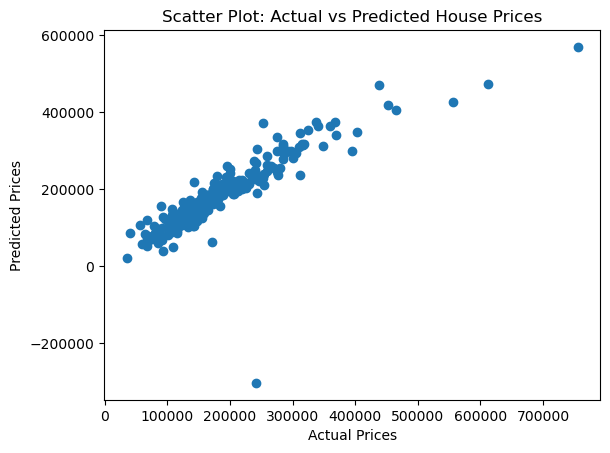

In [118]:
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot: Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()